Hi, Marcel! 

Hope it'll help you to run my code quicker :)

Alex

## Input format

| ID |     Name    | FA_Name | Value |
|---:|:-----------:|:-------:|-------|
|  1 | Revenue_123 | Revenue | -100  |
where **ID** - is actual Business Processes ID, **Name** is the full name of FinancialAccount (not sure that it's required, but initially as I guess one has something like "Revenue_1", "Revenue_2" for different product and only after application of Coarse-graining financial accounts we are getting **FA_Name** value. **Value** is just a amount.
## Extraction signatures of BP
For that purpose I've implemented aggregation function over *groupby()* object, as input it uses one BP – a part of original DF with the same ID value – and return a string like
```
'([(\\'Revenue\\', 0.8336558167088283), (\\'Tax\\', 0.1663441832911717)], [(\\'TradeReceivables\\', 1.0)])'
```
then we leave only unique signatures (SAME FA from left and right part AND EXACTLY EQUAL coefficients).
## Data preprocessing
Then on that DataFrame you need to apply [*prepare_data()*](https://github.com/AlexWorldD/NetEmbs/blob/master/NetEmbs/DataProcessing/prepare_data.py) - please read the documentation to that function. The last thing I've added is 
```
 :param unique: True if Data has to be filtered wrt to Signatures of BPs
 ```

After that you should get the following structure:

| ID |     Name    | FA_Name | Value | Debit | Credit | from |
|---:|:-----------:|:-------:|-------|-------|--------|------|
|  1 | Revenue_123 | Revenue | -100  | 0.0   | 1.0    | True |

here **from** is for visualization purposes only (different colors of ingoing/outgoing edges)
## Construct FSN
Now we can construct FSN from our DataFrame, *build()* method of *FSN* class. 

I recommend to check the construction via *get_FA()* method, it should return the set of Financial Account nodes.
## RandomWalks
#### Already implemented step strategies
1. Pure RandomWalk (uniform probabilities, follows the direction)
2. MetaDef (change directions, uniform probabilities)
3. MetaDefWeighted (change directions, weighted probabilities "rich gets richer")
4. MetaDiff (change directions, probabilities depend on the differences between edges)

For test purpose you can try *randomWalk()* from NetEmbs.FSN.utils, it returns the sampled sequence. 

**BUT**, I've implemented special helper funciton for adding to original DataFrame a column with N top joint-appearance nodes. It's *add_similar()* function from NetEmbs.FSN.utils.

You also can test it with different step strategies: "DefUniform", "DefWeighted", "MetaUniform", "MetaWeighted", "MetaDiff" (version argument).

### Example with sampled data

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.rcParams["figure.figsize"] = [20,10]
from NetEmbs.DataProcessing.normalize import normalize
from NetEmbs.DataProcessing.connect_db import *
from NetEmbs.GenerateData.complex_df import sales_collections
d = upload_data("Simulation/FSN_Data.db", limit=1000)
d.head(5)

,ID,Name,FA_Name,Value
2,2,Revenue_5,Revenue,-788.000000
3,2,Tax_5,Tax,-47.132907
4,2,ixsros_5,ixsros,0.003332
5,2,jlgnur_5,jlgnur,1.406287
6,2,aofere_5,aofere,1.142330


### Marcel, below you can test your input format, it should work correctly

Taking into account that real data already has two columns with debited and credited amounts, for preprocessing it you need to apply sequentially 

*rename_columns()*

with default arguments it's fit for your column titles and then 

*prepare_data(..., split=False)*

In [4]:
from NetEmbs.DataProcessing import *
journal_entries = None
if journal_entries is None:
    d = prepare_data(d)
else:
    YOUR_DATAFRAME = pd.DataFrame.from_dict(journal_entries)
    YOUR_DATAFRAME.columns = ['ID', 'FA_Name', 'Debit', 'Credit']
    d = prepare_data(YOUR_DATAFRAME, split=False)
d.head(20)

,ID,Signature,FA_Name,Debit,Credit,from
0,2,"([('Revenue', 0.94356), ('Tax', 0.05644)], [('...",Revenue,0.000000,0.943562,True
1,2,"([('Revenue', 0.94356), ('Tax', 0.05644)], [('...",Tax,0.000000,0.056438,True
2,2,"([('Revenue', 0.94356), ('Tax', 0.05644)], [('...",TradeReceivables,0.990561,0.000000,False
3,2,"([('Revenue', 0.94356), ('Tax', 0.05644)], [('...",aofere,0.001368,0.000000,False
4,2,"([('Revenue', 0.94356), ('Tax', 0.05644)], [('...",dtnasn,0.001912,0.000000,False
5,2,"([('Revenue', 0.94356), ('Tax', 0.05644)], [('...",freafi,0.003210,0.000000,False
6,2,"([('Revenue', 0.94356), ('Tax', 0.05644)], [('...",ixsros,0.000004,0.000000,False
7,2,"([('Revenue', 0.94356), ('Tax', 0.05644)], [('...",jlgnur,0.001684,0.000000,False
8,2,"([('Revenue', 0.94356), ('Tax', 0.05644)], [('...",tipvke,0.001261,0.000000,False
9,3,"([('Inventory', 1.0)], [('CostOfSales', 1.0)])",CostOfSales,1.000000,0.000000,False


In [12]:
for k, group in d.groupby("ID"):
    if group.shape[0]>6:
        group.to_excel("ex.xlsx")

In [5]:
from NetEmbs.FSN.graph import FSN
fsn = FSN()
fsn.build(d, left_title="FA_Name")
fsn.nodes()

NodeView((2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 50, 51, 52, 54, 55, 56, 58, 59, 60, 61, 65, 68, 69, 71, 72, 73, 74, 75, 76, 77, 78, 80, 83, 84, 85, 88, 90, 94, 95, 96, 97, 98, 99, 100, 102, 104, 105, 107, 109, 111, 112, 114, 115, 117, 120, 121, 122, 123, 125, 126, 127, 129, 134, 136, 137, 140, 141, 142, 143, 145, 146, 148, 150, 151, 152, 154, 155, 157, 158, 160, 161, 162, 163, 165, 168, 171, 174, 175, 177, 178, 179, 180, 184, 185, 186, 189, 190, 'Revenue', 'Tax', 'TradeReceivables', 'aofere', 'dtnasn', 'freafi', 'ixsros', 'jlgnur', 'tipvke', 'CostOfSales', 'Inventory', 'FixedAssets', 'TradePayables', 'mkiqye', 'pmcvyz', 'rfevag', 'thummq', 'uoquxo', 'xmyjjx', 'bxtqwz', 'epvwqs', 'jkkbmp', 'kdptbq', 'qvscnp', 'ruxrek', 'wybcvt', 'xjvkig', 'ztfpdz', 'zyzvrs', 'lswkze', 'mlmrie', 'nzdzyf', 'rcfnmn', 'xuwbfn', 'fujvdr', 'refmmh', 'cwzgjz', 'hupiwv', 'irnymx', 'reyzw

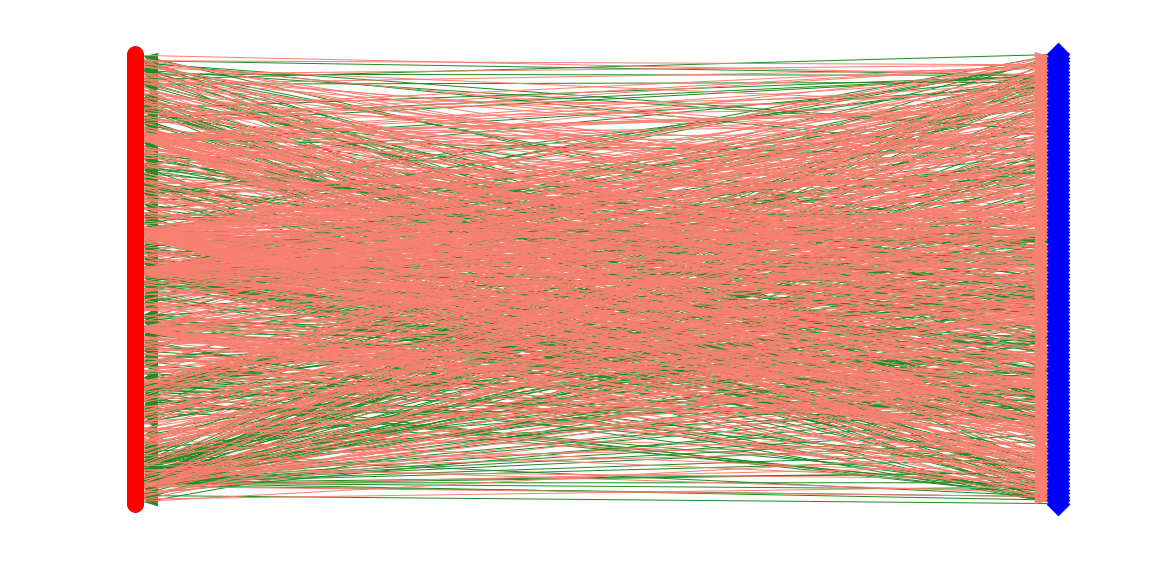

In [6]:
from NetEmbs.Vis.plots import plotFSN
plotFSN(fsn, edge_labels=False, node_labels=False)

In [6]:
from NetEmbs.FSN.utils import add_similar, get_pairs
add_similar(d, direction="COMBI").head(5)

,ID,Signature,FA_Name,Debit,Credit,from,Similar_BP
0,1,"([('Revenue', 0.82621), ('Tax', 0.17379)], [('...",Revenue,0.000000,0.826208,True,"[(9, 89), (11, 79), (24, 69)]"
1,1,"([('Revenue', 0.82621), ('Tax', 0.17379)], [('...",Tax,0.000000,0.173792,True,"[(9, 89), (11, 79), (24, 69)]"
2,1,"([('Revenue', 0.82621), ('Tax', 0.17379)], [('...",TradeReceivables,1.000000,0.000000,False,"[(9, 89), (11, 79), (24, 69)]"
3,2,"([('Inventory', 0.98588), ('balzki', 0.00538),...",CostOfSales,0.991273,0.000000,False,"[(5, 196), (10, 153)]"
4,2,"([('Inventory', 0.98588), ('balzki', 0.00538),...",Inventory,0.000000,0.985881,True,"[(5, 196), (10, 153)]"


## Testing different Pairs construction

In [ ]:
from NetEmbs.FSN import *
randomWalk(fsn, 1, length=10, direction="COMBI")

In [ ]:
list(fsn.successors(7)), list(fsn.predecessors(7))

In [ ]:
d["ID"].unique()

In [7]:
from NetEmbs.FSN.utils import similar
from NetEmbs.Logs.custom_logger import log_me
pd.set_option('display.max_colwidth', -1)
MAIN_LOGGER = log_me()
MAIN_LOGGER.info("Started..")
d = prepare_data(upload_data("Simulation/FSN_Data.db", limit=200))
similar(d, direction=["COMBI"]).head(15)

Done with extraction Journal Entries data!
Done with RandomWalking... Found  3  top


,ID,Signature,MetaDiff_COMBI
0,2,"([('Revenue', 0.94356), ('Tax', 0.05644)], [('TradeReceivables', 0.99056), ('aofere', 0.00137), ('dtnasn', 0.00191), ('freafi', 0.00321), ('ixsros', 0.0), ('jlgnur', 0.00168), ('tipvke', 0.00126)])","[([('Revenue', 0.92869), ('Tax', 0.05553), ('epvwqs', 0.00093), ('jkkbmp', 0.00348), ('ruxrek', 0.00457), ('wybcvt', 0.00058), ('ztfpdz', 0.00324), ('zyzvrs', 0.00298)], [('TradeReceivables', 0.99262), ('bxtqwz', 0.00124), ('kdptbq', 0.00203), ('qvscnp', 0.00203), ('xjvkig', 0.00208)]), ---------, ([('Revenue', 0.94321), ('Tax', 0.05679)], [('TradeReceivables', 1.0)]), ---------, ([('Revenue', 0.94296), ('Tax', 0.05704)], [('TradeReceivables', 0.9836), ('jskmur', 0.0021), ('pqodkj', 0.00416), ('tlvrox', 0.00401), ('xhotuh', 0.00288), ('zisirk', 0.00325)]), ---------]"
1,3,"([('Inventory', 1.0)], [('CostOfSales', 1.0)])","[([('Inventory', 0.99985), ('edohio', 0.00015)], [('CostOfSales', 1.0)]), ---------, ([('Inventory', 0.98238), ('avrogm', 0.0034), ('bciaoe', 0.00114), ('iythtx', 0.00371), ('jaquxf', 0.00117), ('ppoerk', 0.00236), ('trvnwq', 0.00087), ('wscqny', 0.00496)], [('CostOfSales', 1.0)]), ---------, ([('Inventory', 1.0)], [('CostOfSales', 0.99387), ('arislx', 0.00208), ('dzzclb', 0.00096), ('jiqeyv', 0.00044), ('nfmyng', 0.0009), ('rcwsvc', 0.00046), ('trgzls', 0.00129)]), ---------]"
2,4,"([('TradePayables', 1.0)], [('FixedAssets', 0.98103), ('mkiqye', 0.00254), ('pmcvyz', 0.0005), ('rfevag', 0.00349), ('thummq', 0.00403), ('uoquxo', 0.00463), ('xmyjjx', 0.00379)])","[([('TradePayables', 0.97873), ('hfjjrg', 0.00368), ('mfnhby', 0.00225), ('myscyz', 0.00282), ('qoftkk', 0.00387), ('sncbqz', 0.00203), ('xndknd', 0.00381), ('zsctix', 0.00281)], [('FixedAssets', 0.99759), ('wwaeit', 0.00241)]), ---------]"
3,5,"([('Revenue', 0.92869), ('Tax', 0.05553), ('epvwqs', 0.00093), ('jkkbmp', 0.00348), ('ruxrek', 0.00457), ('wybcvt', 0.00058), ('ztfpdz', 0.00324), ('zyzvrs', 0.00298)], [('TradeReceivables', 0.99262), ('bxtqwz', 0.00124), ('kdptbq', 0.00203), ('qvscnp', 0.00203), ('xjvkig', 0.00208)])","[([('Revenue', 0.94321), ('Tax', 0.05679)], [('TradeReceivables', 1.0)]), ---------, ([('Revenue', 0.94354), ('Tax', 0.05646)], [('TradeReceivables', 1.0)]), ---------, ([('Revenue', 0.94296), ('Tax', 0.05704)], [('TradeReceivables', 0.9836), ('jskmur', 0.0021), ('pqodkj', 0.00416), ('tlvrox', 0.00401), ('xhotuh', 0.00288), ('zisirk', 0.00325)]), ---------]"
4,6,"([('Inventory', 1.0)], [('CostOfSales', 0.9915), ('lswkze', 0.00025), ('mlmrie', 0.00054), ('nzdzyf', 0.00112), ('rcfnmn', 0.00193), ('xuwbfn', 0.00466)])","[([('Inventory', 0.99985), ('edohio', 0.00015)], [('CostOfSales', 1.0)]), ---------, ([('Inventory', 0.98739), ('jldvjs', 0.00072), ('orrxic', 0.00142), ('rmwtbo', 0.00079), ('rzwslo', 0.00249), ('zgnvlv', 0.0049), ('zxmgad', 0.00229)], [('CostOfSales', 1.0)]), ---------, ([('Inventory', 0.99391), ('kzovlk', 0.0025), ('symbep', 0.00136), ('yxoemy', 0.00222)], [('CostOfSales', 1.0)]), ---------]"
5,7,"([('Revenue', 0.82314), ('Tax', 0.17394), ('fujvdr', 0.00067), ('refmmh', 0.00226)], [('TradeReceivables', 1.0)])","[([('Revenue', 0.82511), ('Tax', 0.17164), ('iidukl', 0.00325)], [('TradeReceivables', 1.0)]), ---------, ([('Revenue', 0.94354), ('Tax', 0.05646)], [('TradeReceivables', 1.0)]), ---------, ([('Revenue', 0.82733), ('Tax', 0.17267)], [('TradeReceivables', 0.99671), ('rkegjm', 0.00329)]), ---------]"
6,8,"([('Inventory', 0.99513), ('hupiwv', 0.00315), ('irnymx', 0.00087), ('reyzwj', 0.00085)], [('CostOfSales', 0.99606), ('cwzgjz', 0.00394)])","[([('Inventory', 0.99985), ('edohio', 0.00015)], [('CostOfSales', 1.0)]), ---------, ([('Inventory', 0.98739), ('jldvjs', 0.00072), ('orrxic', 0.00142), ('rmwtbo', 0.00079), ('rzwslo', 0.00249), ('zgnvlv', 0.0049), ('zxmgad', 0.00229)], [('CostOfSales', 1.0)]), ---------, ([('Inventory', 1.0)], [('CostOfSales', 1.0)]), ---------]"
7,9,"([('Cash', 1.0)], [('Tax', 1.0)])","[([('Cash', 1.0)], [('EBPayables', 1.0)]), ---------]"
8,10,"([('Reven

## Tests

In [ ]:
from NetEmbs.FSN.utils import make_pairs
t = [1,2,3,1,2]
out = make_pairs(t, window=2)
out

# Skip-Gram model
Previously we've gotten a list of tuples where the first item is input word in term of Skip-gram model and the second item is output word. Hence, one can implement the simplest skip-gram model over it.

In [8]:
from NetEmbs.FSN.utils import *
skip_grams, fsn, enc_dec = get_SkipGrams(d)
skip_grams[:5]

[(0, 7), (0, 21), (0, 19), (7, 0), (7, 21)]

### Batch function

In [10]:
def generate_batch(all_data, batch_size):
    _t = np.random.randint(0, len(all_data), batch_size)
    batch = np.ndarray(shape=(batch_size), dtype=np.int32, buffer=np.array([all_data[t][0] for t in _t]))
    context = np.ndarray(shape=(batch_size, 1), dtype=np.int32, buffer=np.array([all_data[t][1] for t in _t]))
    return batch, context

In [10]:
generate_batch(skip_grams[:100], 3)

(array([19,  0, 21], dtype=int32), array([[0],
        [0],
        [9]], dtype=int32))

### TensorFlow

In [8]:
from NetEmbs.SkipGram import *
import seaborn as sns

In [9]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

res = get_embs_TF(path_file="Simulation/FSN_Data.db", embed_size=8)

[(0, 63), (0, 17), (0, 56), (63, 0), (63, 17)]
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Initialized
Average train loss at step  0 :  2.537259101867676
Nearest to 51: 44, 3, 50,
Nearest to 65: 46, 77, 28,
Nearest to 24: 20, 82, 12,
Nearest to 34: 2, 50, 3,
Average train loss at step  1000 :  0.7523887575268745
Average train loss at step  2000 :  0.474689807087183
Average train loss at step  3000 :  0.37327349473536015
Average train loss at step  4000 :  0.29214778554439547
Average train loss at step  5000 :  0.26008244293183086
Nearest to 51: 16, 39, 54,
Nearest to 65: 25, 29, 47,
Nearest to 24: 20, 52, 31,
Nearest to 34: 30, 7, 19,
Average train loss at step  6000 :  0.25109273070842025
Average train loss at step  7000 :  0.24394769594818352
Average train loss at step  8000 :  0.2405696699768305
Average train loss at step  9000 :  0.2388450234159827
Average train loss at step  10000 :  0.24191661567986011
Nearest to 51: 16, 39, 

Collections


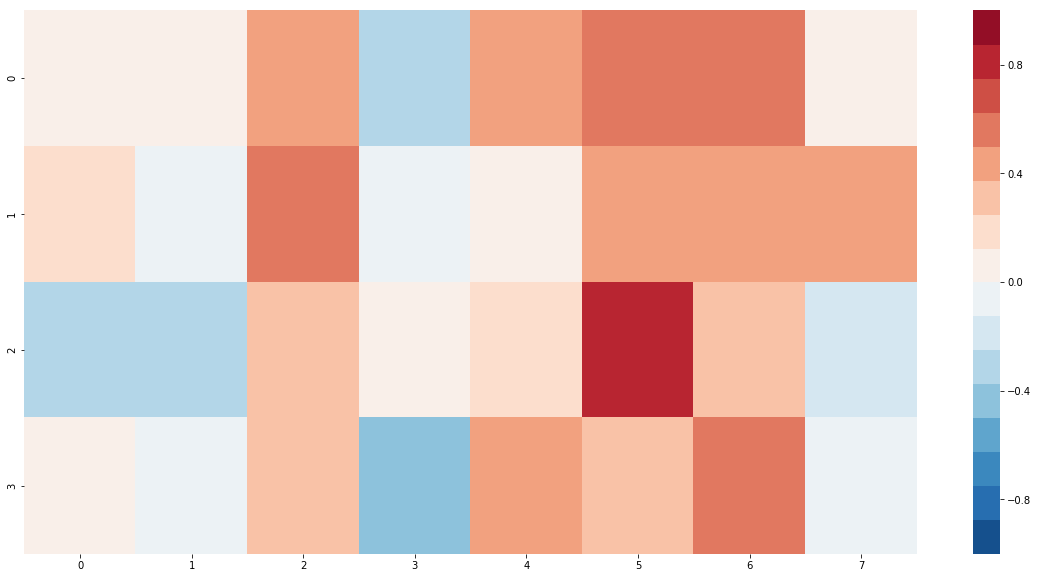

Cost of Sales


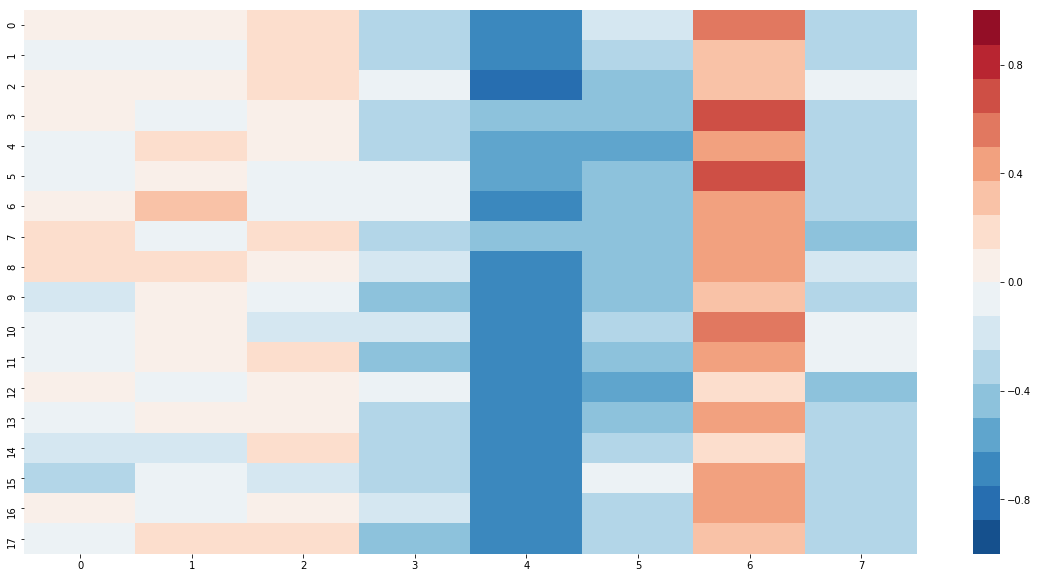

Depreciation
Not enough samples...
Fixed Assets


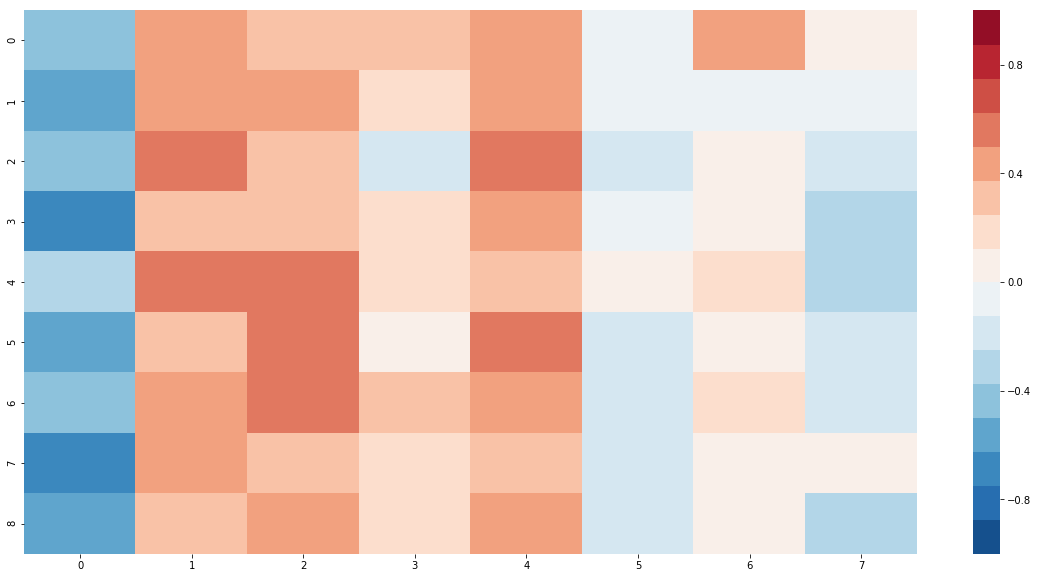

Payroll


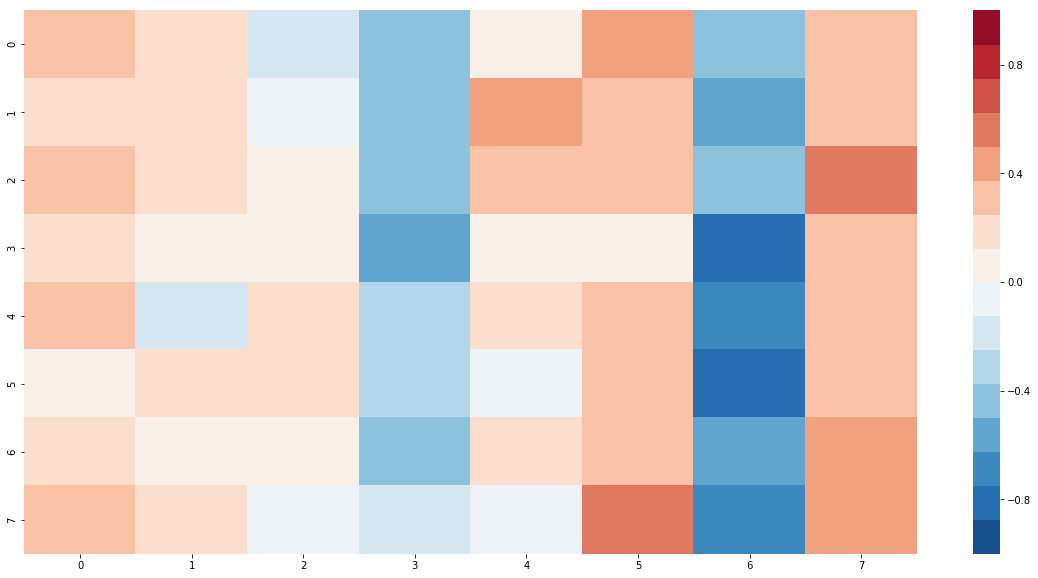

Payroll Disbursement
Not enough samples...
Purchase
Not enough samples...
Sales 21 btw


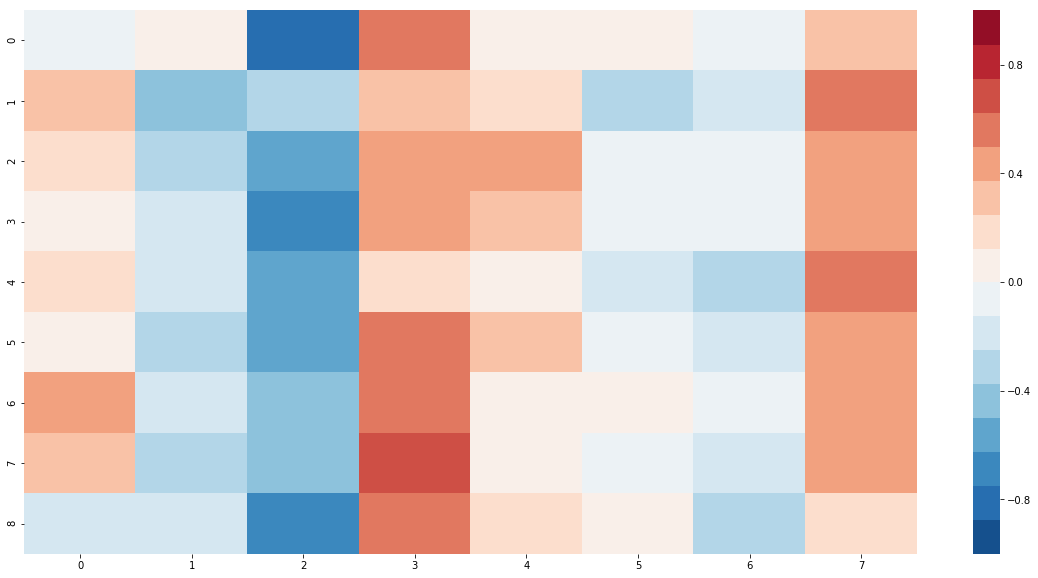

Sales 6 btw


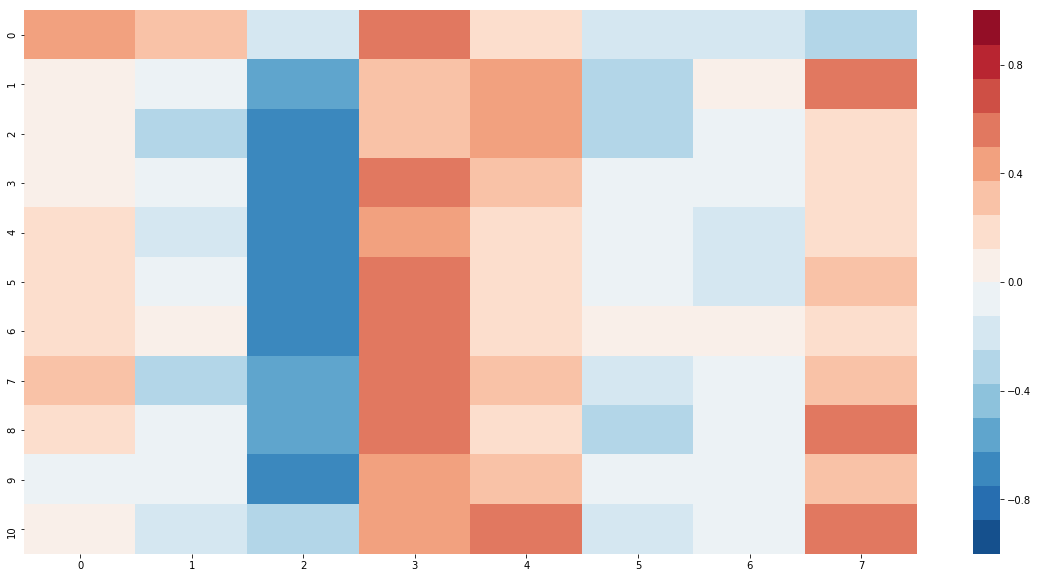

Tax disbursement
Not enough samples...


In [10]:
for name, group in res.groupby("FA_Name"):
    print(name)
    if group.shape[0] > 3:
        sns.heatmap(list(group["Emb"].values), vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 16))
        plt.show()
    else:
        print("Not enough samples...")

In [11]:
res2 = get_embs_TF(path_file="Simulation/FSN_Data.db", embed_size=8, num_steps=50000, walks_per_node=50, walk_length=20)

[(0, 63), (0, 17), (0, 56), (63, 0), (63, 17)]
Initialized
Average train loss at step  0 :  3.3919544219970703
Nearest to 77: 33, 39, 52,
Nearest to 75: 60, 34, 74,
Nearest to 16: 24, 23, 43,
Nearest to 22: 3, 33, 77,
Average train loss at step  1000 :  0.7684688333570957
Average train loss at step  2000 :  0.4459245784878731
Average train loss at step  3000 :  0.3357844965159893
Average train loss at step  4000 :  0.28757542339712383
Average train loss at step  5000 :  0.26098743054270745
Nearest to 77: 33, 55, 52,
Nearest to 75: 65, 25, 56,
Nearest to 16: 23, 34, 5,
Nearest to 22: 3, 72, 31,
Average train loss at step  6000 :  0.25531328372657297
Average train loss at step  7000 :  0.2565033314079046
Average train loss at step  8000 :  0.251665905110538
Average train loss at step  9000 :  0.24562183307111263
Average train loss at step  10000 :  0.24889470037072897
Nearest to 77: 33, 52, 72,
Nearest to 75: 56, 25, 65,
Nearest to 16: 23, 5, 34,
Nearest to 22: 72, 31, 8,
Average train l

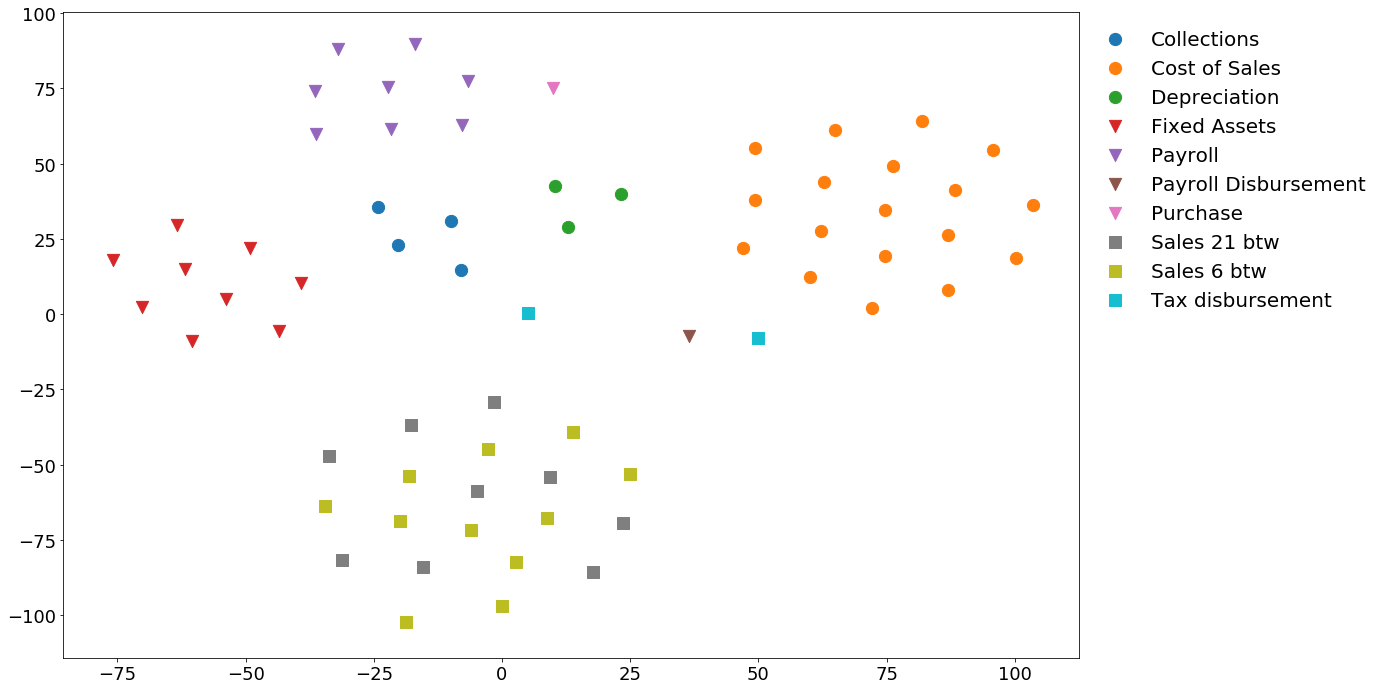

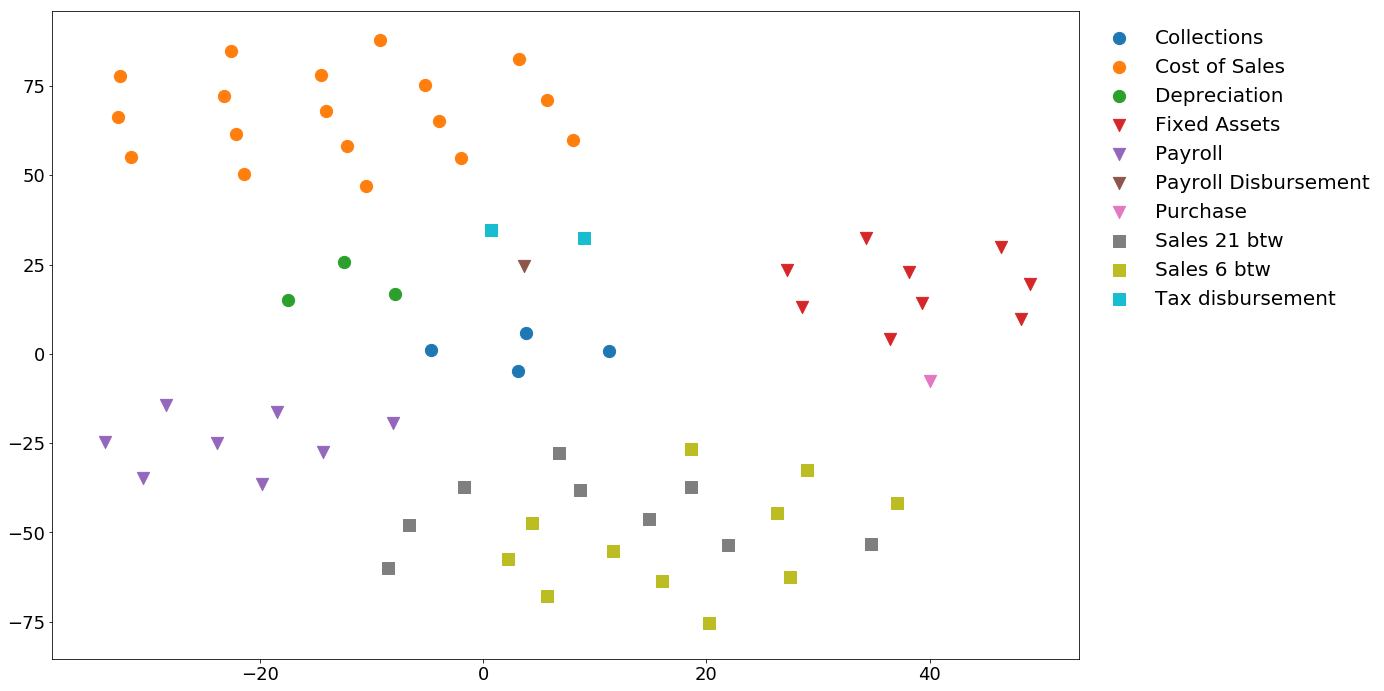

In [12]:
def plot_tSNE(fsn_embs, title="tSNE", rand_state=1, manual=False):
    import os
    os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
    import matplotlib.pyplot as plt
    from sklearn.manifold import TSNE
    tsne = TSNE(random_state=rand_state)
    embdf = pd.DataFrame(list(map(np.ravel, fsn_embs.iloc[:, 1])))
    embed_tsne = tsne.fit_transform(embdf)
    fsn_embs["x"] = pd.Series(embed_tsne[:, 0])
    fsn_embs["y"] = pd.Series(embed_tsne[:, 1])
    import seaborn as sns
    markers = ["o", "v", "s"]
    cur_m=0
    if manual:
        plt.clf()
        n_gr = 0
        for name, group in fsn_embs.groupby("FA_Name"):
            n_gr+=1
            if n_gr>3:
                cur_m = cur_m+1 if len(markers)-1>cur_m else 0
                n_gr=0
            plt.scatter(group["x"].values, group["y"].values, s=150, marker=markers[cur_m], label=name)
#         sns.scatterplot(data=fsn_embs, x="x", y="y", hue="FA_Name", s=150)
        plt.legend(bbox_to_anchor=(1.3, 1), loc="upper right", frameon=False, markerscale=1)
    else:
        fg = sns.FacetGrid(data=fsn_embs, hue='FA_Name', aspect=1.61, height=6, legend_out=True)
        fg.map(pyplot.scatter, 'x', 'y')
        fg.add_legend()
    if title is not None and isinstance(title, str):
        plt.tight_layout()
        plt.savefig("img/" + title, dpi=140, pad_inches=0.01)
    plt.show()
    return fsn_embs
def set_font(s, reset=False):
    if reset:
        plt.rcParams.update(plt.rcParamsDefault)
    plt.rcParams["figure.figsize"] = [20,10]
#     plt.rcParams['font.family'] = 'serif'
#     plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
    plt.rc('font', size=s)          # controls default text sizes
    plt.rc('axes', titlesize=s)     # fontsize of the axes title
    plt.rc('axes', labelsize=s)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=s-2)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=s-2)    # fontsize of the tick labels
    plt.rc('legend', fontsize=s)    # legend fontsize
    plt.rc('figure', titlesize=s)  # fontsize of the figure title

rand_seed = 2
set_font(20)
_ = plot_tSNE(res, "FastTrain10k", rand_seed, manual=True)
dd = plot_tSNE(res2, "LongTrain50k", rand_seed, manual=True)

## Clustering Init

In [16]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
res2[res2["FA_Name"]=="Sales 21 btw"].head(5)

,ID,Emb,FA_Name,x,y
5,7,"[-0.021651914, 0.0105024325, 0.09863326, -0.39527637, 0.32642442, 0.4309514, -0.14925139, -0.7203478]",Sales 21 btw,8.695844,-38.090687
8,10,"[0.005872156, 0.086065896, 0.17540501, -0.61566144, 0.28974837, 0.5133966, -0.1910077, -0.4458003]",Sales 21 btw,6.789606,-27.744026
14,16,"[0.061600085, -0.19118582, 0.16518335, -0.30803332, 0.43718794, 0.42971757, -0.38213763, -0.56183946]",Sales 21 btw,-1.691022,-37.373486
21,23,"[0.1090674, -0.28990516, 0.41186208, -0.15996309, 0.39801982, 0.2833943, -0.15125465, -0.66875315]",Sales 21 btw,34.740589,-53.299744
24,26,"[0.16708134, -0.09857595, 0.19664441, -0.44312567, 0.1642198, 0.45797825, -0.027710747, -0.6998978]",Sales 21 btw,14.898283,-46.192978


In [17]:
NUM_CL_MAX = 10
cl = pd.DataFrame(list(map(np.ravel, res2.iloc[:, 1])))
print("First row of Data: \n", cl.iloc[0].values)
cur_score = 0.0
cur_num_cls = 2
for cur_cl in range(2, NUM_CL_MAX):
    km = KMeans(n_clusters=cur_cl)
    predicted_labels = km.fit_predict(cl)
    silhouette_avg = silhouette_score(cl, predicted_labels)
    if silhouette_avg >= cur_score:
        cur_score = silhouette_avg
        cur_num_cl = cur_cl
print("Optimal number of clusters is = ", cur_num_cl,
          "The average silhouette_score is :", cur_score)

First row of Data: 
 [-0.34119132 -0.17744504  0.44687065 -0.46985868 -0.32088223  0.16788746
 -0.2707527  -0.4766368 ]
Optimal number of clusters is =  7 The average silhouette_score is : 0.5378217281292604


In [13]:
def plot_clusters(fsn_embs, n_cl = 6, title="KMean", rand_state=1, manual=True):
    import os
    random.seed(rand_state)
    os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
    import matplotlib.pyplot as plt
    from sklearn.manifold import TSNE
    tsne = TSNE(random_state=rand_state)
    embdf = pd.DataFrame(list(map(np.ravel, fsn_embs.iloc[:, 1])))
    #     Clustering stuff
    print("First row of Data: \n", embdf.iloc[0].values)
    km = KMeans(n_clusters=n_cl)
    predicted_labels = km.fit_predict(embdf)
    centroids = km.cluster_centers_
    silhouette_avg = silhouette_score(cl, predicted_labels)
    print("For n_clusters = ", n_cl,
              "The average silhouette_score is :", silhouette_avg)
#     TODO sync TSNE without clusters centers
    embdf = embdf.append(pd.DataFrame(centroids))
    embed_tsne = tsne.fit_transform(embdf)
    print(len(embed_tsne))
    fsn_embs["x"] = pd.Series(embed_tsne[:-n_cl, 0])
    fsn_embs["y"] = pd.Series(embed_tsne[:-n_cl, 1])
    import seaborn as sns
    markers = ["o", "v", "s"]
    cur_m=0
    if manual:
        plt.clf()
        n_gr = 0
        for name, group in fsn_embs.groupby("FA_Name"):
            n_gr+=1
            if n_gr>10:
                cur_m = cur_m+1 if len(markers)-1>cur_m else 0
                n_gr=0
            plt.scatter(group["x"].values, group["y"].values, s=150, marker=markers[cur_m], label=name)
#         sns.scatterplot(data=fsn_embs, x="x", y="y", hue="FA_Name", s=150)
        plt.legend(bbox_to_anchor=(1.3, 1), loc="upper right", frameon=False, markerscale=2)
    else:
        fg = sns.FacetGrid(data=fsn_embs, hue='FA_Name', aspect=1.61, height=6, legend_out=True)
        fg.map(pyplot.scatter, 'x', 'y')
        fg.add_legend()
    plt.scatter(embed_tsne[-n_cl:, 0], embed_tsne[-n_cl:, 1], marker='*', s=300, c='r', label='centroid')
    plt.show()
    if title is not None and isinstance(title, str):
        plt.tight_layout()
        plt.savefig("img/" + title, dpi=140, pad_inches=0.01)
    return fsn_embs

## !Graphs differ because tSNE use all datatpoint during transformaiton (in our case we add clusters centers)

First row of Data: 
 [-0.34119132 -0.17744504  0.44687065 -0.46985868 -0.32088223  0.16788746
 -0.2707527  -0.4766368 ]
For n_clusters =  7 The average silhouette_score is : 0.5378217281292604
73


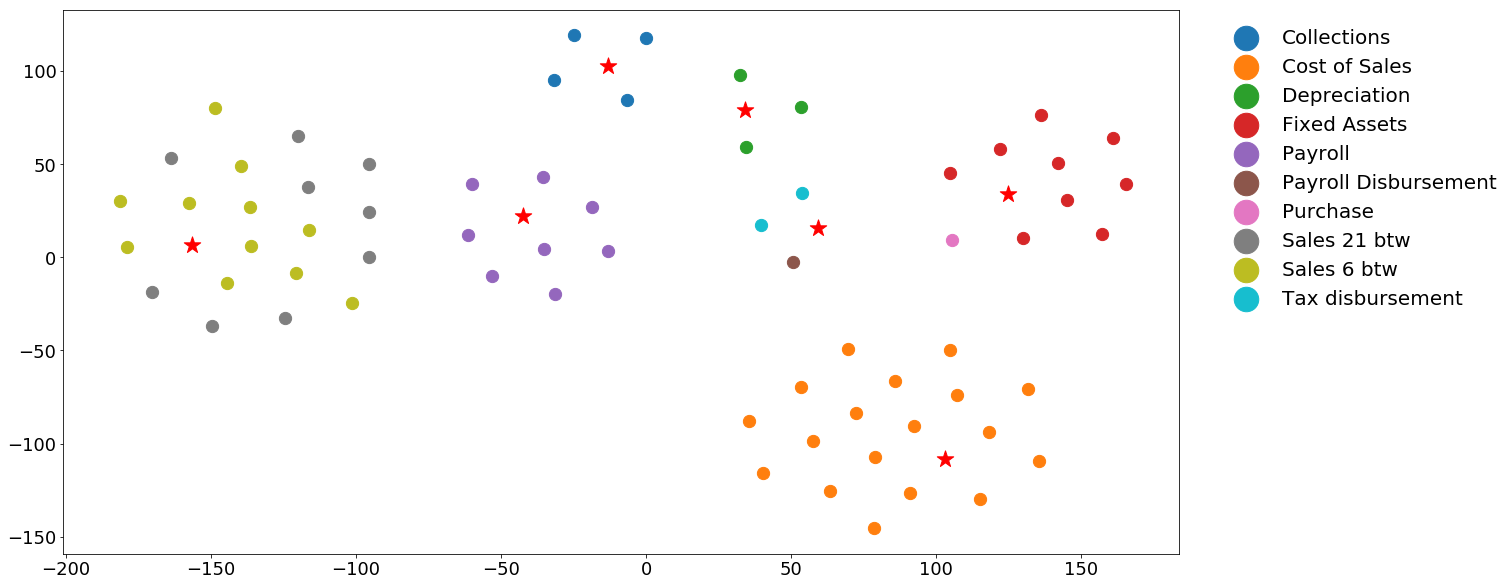

<Figure size 1440x720 with 0 Axes>

In [18]:
_ = plot_clusters(res2, 7, rand_state=24)

## Agglomerative Clustering

In [170]:
NUM_CL_MAX = 10
cl = pd.DataFrame(list(map(np.ravel, res2.iloc[:, 1])))
print("First row of Data: \n", cl.iloc[0].values)
cur_score = 0.0
cur_num_cls = 2
for cur_cl in range(2, NUM_CL_MAX):
    km = AgglomerativeClustering(n_clusters=cur_cl)
    predicted_labels = km.fit_predict(cl)
    silhouette_avg = silhouette_score(cl, predicted_labels)
    if silhouette_avg >= cur_score:
        cur_score = silhouette_avg
        cur_num_cl = cur_cl
print("Optimal number of clusters is = ", cur_num_cl,
          "The average silhouette_score is :", cur_score)

First row of Data: 
 [ 0.41521674  0.32345572  0.35755301  0.62009531 -0.15125076  0.24258587
  0.08962632  0.34763697]
Optimal number of clusters is =  7 The average silhouette_score is : 0.5435017145109018


In [209]:
res2["FA_Name"].unique()

array(['Sales 21 btw', 'Cost of Sales', 'Tax disbursement', 'Sales 6 btw',
       'Payroll', 'Payroll Disbursement', 'Fixed Assets', 'Purchase',
       'Depreciation', 'Collections'], dtype=object)

In [252]:
def plot_clusters2(fsn_embs, n_cl = 7, title="KMean", rand_state=1, manual=True):
    import os
    random.seed(rand_state)
    os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
    import matplotlib.pyplot as plt
    from sklearn.manifold import TSNE
    tsne = TSNE(random_state=rand_state)
    embdf = pd.DataFrame(list(map(np.ravel, fsn_embs.iloc[:, 1])))
    #     Clustering stuff
    print("First row of Data: \n", embdf.iloc[0].values)
    agg = AgglomerativeClustering(n_clusters=n_cl)
    predicted_labels = agg.fit_predict(embdf)
    print(predicted_labels)
    silhouette_avg = silhouette_score(cl, predicted_labels)
    print("For n_clusters = ", n_cl,
              "The average silhouette_score is :", silhouette_avg)
#     TODO sync TSNE without clusters centers
    embed_tsne = tsne.fit_transform(embdf)
    print(len(embed_tsne))
    fsn_embs["x"] = pd.Series(embed_tsne[:, 0])
    fsn_embs["y"] = pd.Series(embed_tsne[:, 1])
    fsn_embs["label"] = pd.Series(predicted_labels)
    import seaborn as sns
    marks = {'Sales 21 btw': "o", 'Cost of Sales': "o", 'Tax disbursement': "o", 'Sales 6 btw': "v",
       'Payroll': "v", 'Payroll Disbursement':"v", 'Fixed Assets': "s", 'Purchase': "v",
       'Depreciation': "s", 'Collections': "o"}
    marks2 = {5:0, 3:1, 1:2, 0:3, 6:4, 7:5, 8:6, 4:7, 2:8, 7:9, 9:10 }
    markers = ["o", "v", "s"]
    cur_m=0
    if manual:
        plt.clf()
        n_gr = 0
        plt.scatter(fsn_embs["x"].values, fsn_embs["y"].values, s=200, 
                    c=[marks2[it] for it in fsn_embs["label"].values])
        for name, group in fsn_embs.groupby("FA_Name"):
            print(name, group["label"].values)
            n_gr+=1
            if n_gr>10:
                cur_m = cur_m+1 if len(markers)-1>cur_m else 0
                n_gr=0
            plt.scatter(group["x"].values, group["y"].values, s=100, 
                            marker=markers[cur_m], label=name)
#         sns.scatterplot(data=fsn_embs, x="x", y="y", hue="FA_Name", s=150)
        plt.legend(bbox_to_anchor=(1.3, 1), loc="upper right", frameon=False, markerscale=2)
    else:
        fg = sns.FacetGrid(data=fsn_embs, hue='label', aspect=1.61, height=6, legend_out=True)
        fg.map(pyplot.scatter, 'x', 'y')
        fg.add_legend()
#     plt.scatter(embed_tsne[-n_cl:, 0], embed_tsne[-n_cl:, 1], marker='*', s=300, c='r', label='centroid')
    plt.show()
    if title is not None and isinstance(title, str):
        plt.tight_layout()
        plt.savefig("img/" + title, dpi=140, pad_inches=0.01)
    return fsn_embs

First row of Data: 
 [ 0.41521674  0.32345572  0.35755301  0.62009531 -0.15125076  0.24258587
  0.08962632  0.34763697]
[9 3 4 2 3 6 2 2 3 2 8 0 7 6 4 1 6 2 5 7 3 7 3 2 1 7 3 2 5 0 5 1 2 7 2 5 7
 3 5 2 1 6 7 3 5 2 5 0 7 2 3 5 1 2 5 7 7 1 6 7 5 7 7 3 7 6 2 2 1 2 2 3 7 2]
For n_clusters =  10 The average silhouette_score is : 0.36932714570596603
74
Collections [5 5 5 5 5 5 5 5 5 5]
Cost of Sales [3 3 3 3 3 3 3 3 3 3 3]
Depreciation [1 1 1 1 1 1 1]
Fixed Assets [0 0 0]
Payroll [6 6 6 6 6 6]
Payroll Disbursement [8]
Purchase [4]
Sales 21 btw [9 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Sales 6 btw [2 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
Tax disbursement [4]


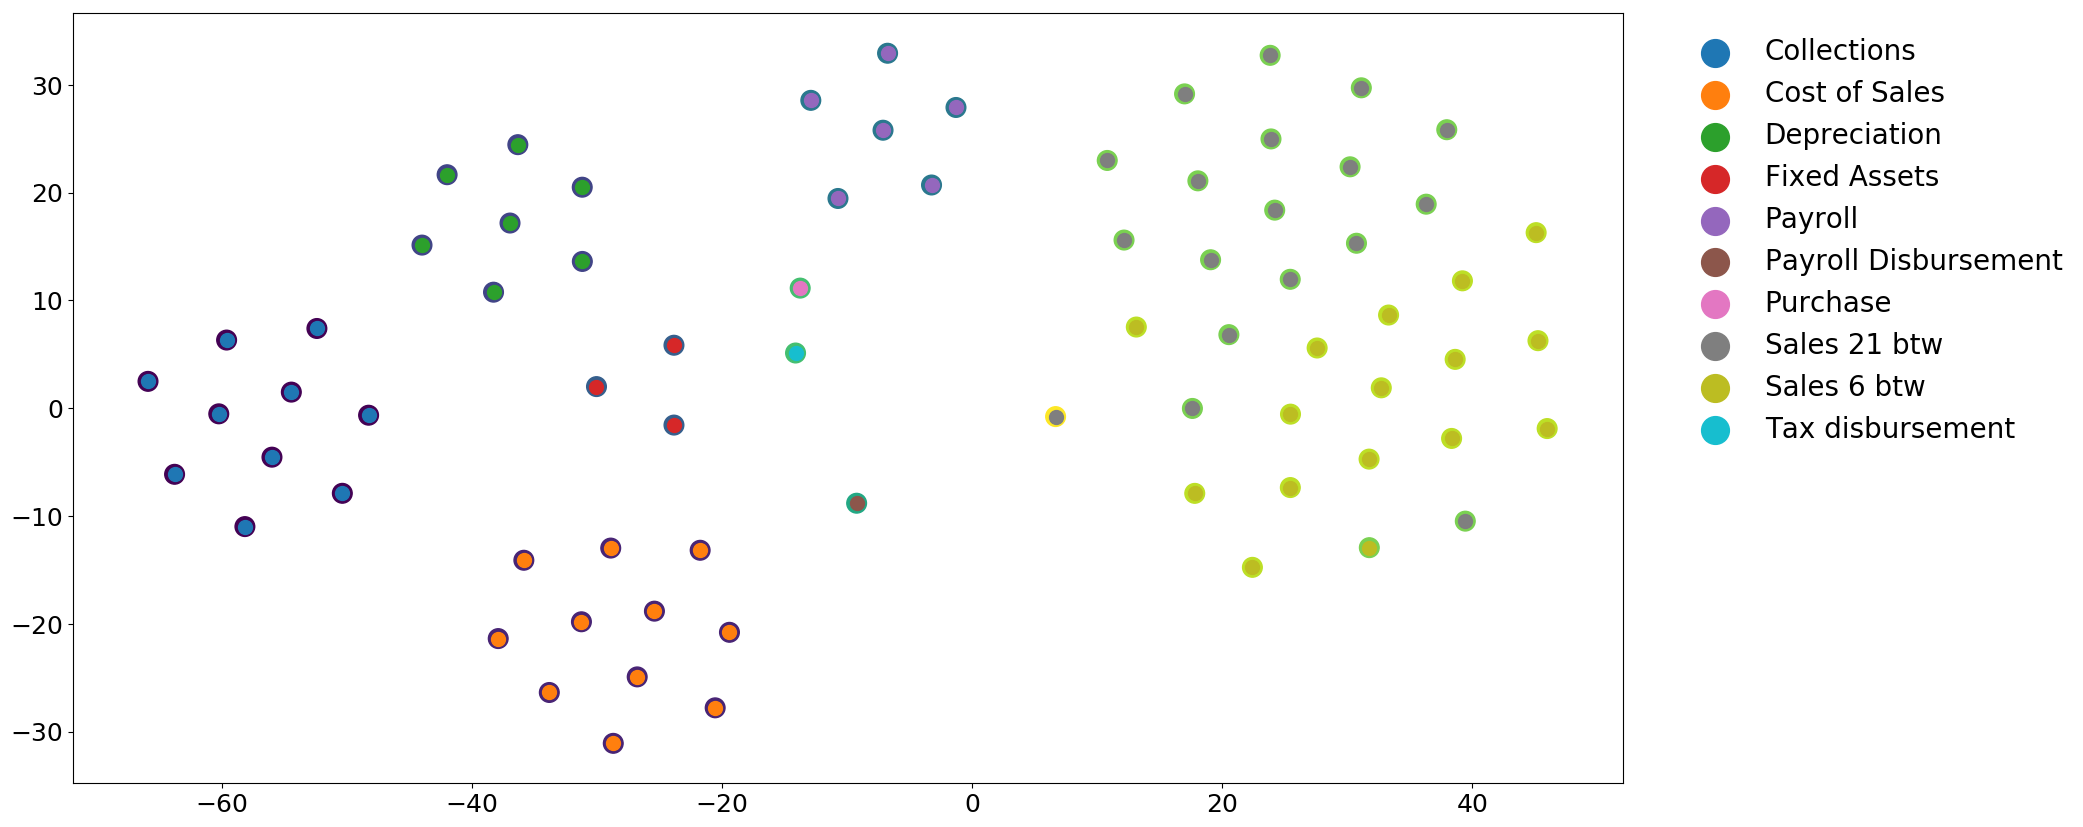

<Figure size 2000x1000 with 0 Axes>

In [253]:
_ = plot_clusters2(res2, 10, rand_state=24)

In [ ]:
from sklearn.mixture import GaussianMixture

In [254]:
res2.head()

,ID,Emb,FA_Name,x,y,label
0,1,"[0.41521674, 0.32345572, 0.357553, 0.6200953, -0.15125076, 0.24258587, 0.08962632, 0.34763697]",Sales 21 btw,6.671056,-0.771008,9
1,2,"[-0.022372996, 0.14127934, 0.08893636, -0.15682231, -0.38071653, -0.55623287, 0.5017563, -0.49085358]",Cost of Sales,-35.857311,-14.095925,3
2,3,"[-0.3881224, -0.44410306, -0.054833557, -0.33656523, 0.32071835, 0.16657387, -0.48045176, -0.41762385]",Tax disbursement,-14.127034,5.125815,4
3,4,"[-0.006983378, -0.14856988, 0.18587574, 0.8360053, 0.3724569, 0.2685686, -0.09325098, -0.15771763]",Sales 6 btw,31.761286,-12.927539,2
4,5,"[0.30536857, -0.061872, -0.015922148, -0.23433568, -0.37059703, -0.35187215, -0.009980906, -0.76583254]",Cost of Sales,-20.554920,-27.783249,3


## Test example

In [262]:
# encoding: utf-8
__author__ = 'Aleksei Maliutin'
"""
graph.py
Last modified by lex at 2019-03-14.
"""
import networkx as nx
from NetEmbs.CONFIG import LOG
import logging

class FSN(nx.DiGraph):
    """
    Financial Statement Network class. Includes construction, projection, plotting methods
    """

    def __init__(self):
        super().__init__()

    def build(self, df, right="ID", name_column="Name"):
        """
        Construct Financial Statement Network (FSN) from DataFrame
        :param df: DataFrame with JournalEntities
        :param name_column: Title of column with FA names: Name or FA_Name
        """
        self.add_nodes_from(df[right], bipartite=0)
        self.add_nodes_from(df[name_column], bipartite=1)
        self.add_weighted_edges_from(
            [(row[name_column], row[right], row["Credit"]) for idx, row in df[df["from"] == True].iterrows()],
            weight='weight', type="CREDIT")
        self.add_weighted_edges_from(
            [(row[right], row[name_column], row["Debit"]) for idx, row in df[df["from"] == False].iterrows()],
            weight='weight', type="DEBIT")
        if LOG:
            local_logger = logging.getLogger("NetEmbs.FSN.build")
            local_logger.info("FSN constructed!")
            local_logger.info("Financial accounts are "+ str(self.get_BP()))

    def build_default(self):
        """
        Construct Financial Statement Network (FSN) with example Sales-Collection business processes
        :return:
        """
        from NetEmbs.GenerateData.complex_df import sales_collections
        from NetEmbs.DataProcessing.normalize import normalize
        df = normalize(sales_collections())
        self.build(df)

    def get_financial_accounts(self):
        """
        Return the set of Financial Account (FA) nodes in network
        :return: set of Financial Account (FA) nodes
        """
        return [n for n, d in self.nodes(data=True) if d['bipartite'] == 1]

    def get_FA(self):
        """
        Return the set of Financial Account (FA) nodes in network
        :return: set of Financial Account (FA) nodes
        """
        return self.get_financial_accounts()

    def get_business_processes(self):
        """
        Return the set of Business Process (BP) nodes in network
        :return: set of Business Process (BP)  nodes
        """
        return [n for n, d in self.nodes(data=True) if d['bipartite'] == 0]

    def get_BP(self):
        """
        Return the set of Business Process (BP) nodes in network
        :return: set of Business Process (BP)  nodes
        """
        return self.get_business_processes()

    def number_of_BP(self):
        """
        Return total number of Business Process (BP) nodes in network
        :return: integer value
        """
        return len(self.get_BP())

    def projection(self, on="BP"):
        """
        Returns the projection of original FSN onto chosen set of nodes
        :param on: type of nodes to project onto
        :return: Projection
        """
        from networkx.algorithms import bipartite
        if on == "BP":
            project_to = [n for n, d in self.nodes(data=True) if d['bipartite'] == 0]
        elif on == "FA":
            project_to = [n for n, d in self.nodes(data=True) if d['bipartite'] == 1]
        return bipartite.weighted_projected_graph(self, project_to)


In [257]:
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.rcParams["figure.figsize"] = [20,10]
from NetEmbs.DataProcessing.normalize import normalize
from NetEmbs.DataProcessing.connect_db import *
from NetEmbs.GenerateData.complex_df import sales_collections
d = upload_data("Simulation/FSN_Data.db", limit=100)
from NetEmbs.DataProcessing import *
journal_entries = None
if journal_entries is None:
    d = prepare_data(d)
else:
    YOUR_DATAFRAME = pd.DataFrame.from_dict(journal_entries)
    YOUR_DATAFRAME.columns = ['ID', 'FA_Name', 'Debit', 'Credit']
    d = prepare_data(YOUR_DATAFRAME, split=False)
d.head(20)

,ID,Signature,FA_Name,Debit,Credit,from
0,1,"([('TradePayables', 1.0)], [('FixedAssets', 0.99133), ('slmtpi', 0.00795), ('sppzzl', 0.00073)])",FixedAssets,0.991327,0.000000,False
1,1,"([('TradePayables', 1.0)], [('FixedAssets', 0.99133), ('slmtpi', 0.00795), ('sppzzl', 0.00073)])",TradePayables,0.000000,1.000000,True
2,1,"([('TradePayables', 1.0)], [('FixedAssets', 0.99133), ('slmtpi', 0.00795), ('sppzzl', 0.00073)])",slmtpi,0.007947,0.000000,False
3,1,"([('TradePayables', 1.0)], [('FixedAssets', 0.99133), ('slmtpi', 0.00795), ('sppzzl', 0.00073)])",sppzzl,0.000726,0.000000,False
4,2,"([('Revenue', 0.82115), ('Tax', 0.17244), ('ncbdic', 0.00641)], [('TradeReceivables', 0.99466), ('oaobdr', 0.00052), ('wksjtm', 0.00483)])",Revenue,0.000000,0.821147,True
5,2,"([('Revenue', 0.82115), ('Tax', 0.17244), ('ncbdic', 0.00641)], [('TradeReceivables', 0.99466), ('oaobdr', 0.00052), ('wksjtm', 0.00483)])",Tax,0.000000,0.172441,True
6,2,"([('Revenue', 0.82115), ('Tax', 0.17244), ('ncbdic', 0.00641)], [('TradeReceivables', 0.99466), ('oaobdr', 0.00052), ('wksjtm', 0.00483)])",TradeReceivables,0.994658,0.000000,False
7,2,"([('Revenue', 0.82115), ('Tax', 0.17244), ('ncbdic', 0.00641)], [('TradeReceivables', 0.99466), ('oaobdr', 0.00052), ('wksjtm', 0.00483)])",ncbdic,0.000000,0.006412,True
8,2,"([('Revenue', 0.82115), ('Tax', 0.17244), ('ncbdic', 0.00641)], [('TradeReceivables', 0.99466), ('oaobdr', 0.00052), ('wksjtm', 0.00483)])",oaobdr,0.000516,0.000000,False
9,2,"([('Revenue', 0.82115), ('Tax', 0.17244), ('ncbdic', 0.00641)], [('TradeReceivables', 0.99466), ('oaobdr', 0.00052), ('wksjtm', 0.00483)])",wksjtm,0.004826,0.000000,False


In [267]:
coarse_gr = d.merge(res2[["ID", "label"]], on="ID", how="right")

In [268]:
coarse_gr.head(5)

,ID,Signature,FA_Name,Debit,Credit,from,label
0,1,"([('TradePayables', 1.0)], [('FixedAssets', 0.99133), ('slmtpi', 0.00795), ('sppzzl', 0.00073)])",FixedAssets,0.991327,0.000000,False,9
1,1,"([('TradePayables', 1.0)], [('FixedAssets', 0.99133), ('slmtpi', 0.00795), ('sppzzl', 0.00073)])",TradePayables,0.000000,1.000000,True,9
2,1,"([('TradePayables', 1.0)], [('FixedAssets', 0.99133), ('slmtpi', 0.00795), ('sppzzl', 0.00073)])",slmtpi,0.007947,0.000000,False,9
3,1,"([('TradePayables', 1.0)], [('FixedAssets', 0.99133), ('slmtpi', 0.00795), ('sppzzl', 0.00073)])",sppzzl,0.000726,0.000000,False,9
4,2,"([('Revenue', 0.82115), ('Tax', 0.17244), ('ncbdic', 0.00641)], [('TradeReceivables', 0.99466), ('oaobdr', 0.00052), ('wksjtm', 0.00483)])",Revenue,0.000000,0.821147,True,3


In [269]:
fsn = FSN()
fsn.build(coarse_gr, name_column="FA_Name", right="label")
fsn.nodes()

NodeView((9, 3, 4, 2, 6, 8, 0, 1, 7, 5, 'FixedAssets', 'TradePayables', 'slmtpi', 'sppzzl', 'Revenue', 'Tax', 'TradeReceivables', 'ncbdic', 'oaobdr', 'wksjtm', 'CostOfSales', 'Inventory', 'Cash', 'EBPayables', 'PersonnelExpenses', 'pjbghc', 'kewxqo', 'njdgnn', 'qvtgxn', 'dsnjdm', 'guvapw', 'ufbsyg', 'vzmlup', 'twpitw', 'DepreciationExpense', 'edmipx', 'lszltq', 'pjtjxy', 'xzudat', 'dheoes', nan))

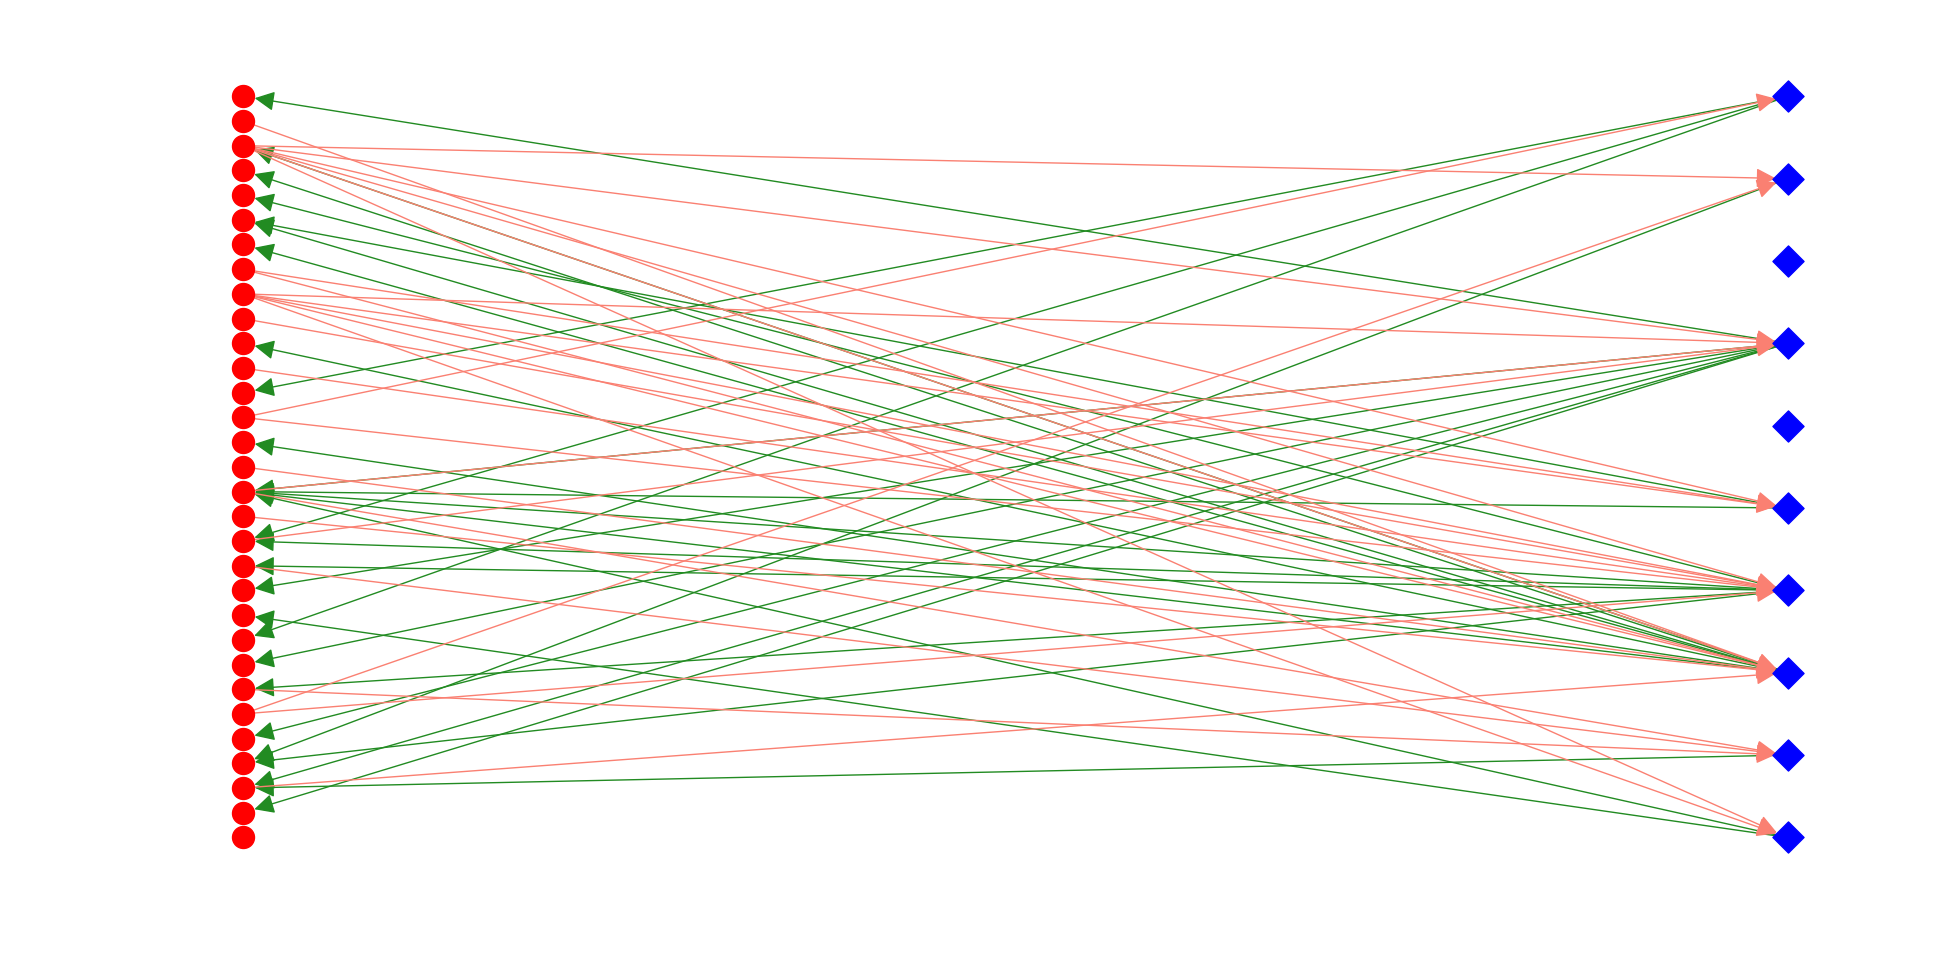

In [270]:
from NetEmbs.Vis.plots import plotFSN
plotFSN(fsn, edge_labels=False, node_labels=False, title="ImgOut")